In [1]:
import tensorflow
from tensorflow import keras
from tensorflow import *
import scipy
import scipy.stats
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [3]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [4]:
conv_base.trainable = False

In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:/Material/Sem5/AI/Research/TLT/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        'C:/Material/Sem5/AI/Research/TLT/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 5536 images belonging to 2 classes.
Found 2373 images belonging to 2 classes.


In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator)

Epoch 1/20
173/173 [==============================] - 306s 2s/step - loss: 0.5390 - accuracy: 0.7422 - val_loss: 0.5706 - val_accuracy: 0.7303
Epoch 2/20
173/173 [==============================] - 304s 2s/step - loss: 0.4176 - accuracy: 0.8125 - val_loss: 0.4131 - val_accuracy: 0.8129
Epoch 3/20
173/173 [==============================] - 184s 1s/step - loss: 0.3913 - accuracy: 0.8311 - val_loss: 0.4591 - val_accuracy: 0.7893
Epoch 4/20
173/173 [==============================] - 169s 975ms/step - loss: 0.3715 - accuracy: 0.8376 - val_loss: 0.4851 - val_accuracy: 0.7771
Epoch 5/20
173/173 [==============================] - 169s 977ms/step - loss: 0.3610 - accuracy: 0.8457 - val_loss: 0.3979 - val_accuracy: 0.8230
Epoch 6/20
173/173 [==============================] - 169s 975ms/step - loss: 0.3459 - accuracy: 0.8593 - val_loss: 0.3779 - val_accuracy: 0.8340
Epoch 7/20
173/173 [==============================] - 170s 982ms/step - loss: 0.3115 - accuracy: 0.8674 - val_loss: 0.4076 - val_accu

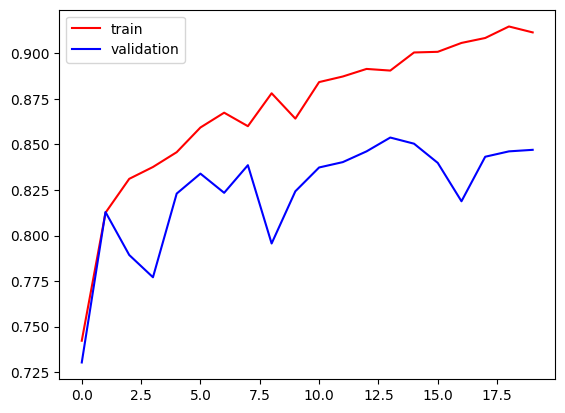

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

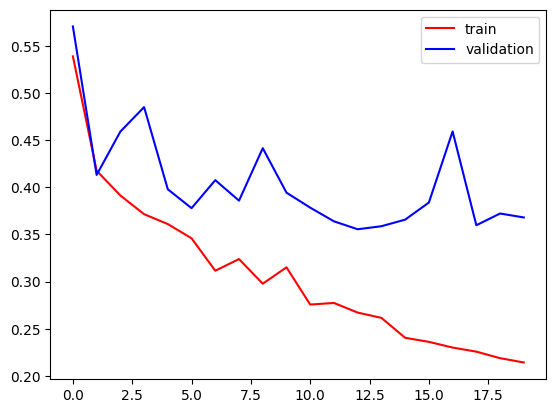

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
model.save('2TL')

INFO:tensorflow:Assets written to: 2TL\assets


INFO:tensorflow:Assets written to: 2TL\assets
